In [538]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import regex as r
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import warnings as w
w.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [539]:
df1=pd.read_csv('laptops_test.csv')
df=pd.DataFrame(df1)
df2=pd.read_csv('laptops_train.csv')
df2=pd.DataFrame(df1)
df2.drop('Storage',axis=1,inplace=True)




In [540]:
df=pd.concat([df1,df2])

In [541]:
df.head(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0


In [542]:
df.shape

(650, 13)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              650 non-null    object 
 1   Model Name                650 non-null    object 
 2   Category                  650 non-null    object 
 3   Screen Size               650 non-null    object 
 4   Screen                    650 non-null    object 
 5   CPU                       650 non-null    object 
 6   RAM                       650 non-null    object 
 7   Storage                   325 non-null    object 
 8   GPU                       650 non-null    object 
 9   Operating System          650 non-null    object 
 10  Operating System Version  582 non-null    object 
 11  Weight                    650 non-null    object 
 12  Price                     650 non-null    float64
dtypes: float64(1), object(12)
memory usage: 71.1+ KB


In [544]:
df['Operating System Version'].fillna(df['Operating System Version'].mode()[0], inplace=True)
df['Storage'].fillna(df['Storage'].mode()[0], inplace=True)

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              650 non-null    object 
 1   Model Name                650 non-null    object 
 2   Category                  650 non-null    object 
 3   Screen Size               650 non-null    object 
 4   Screen                    650 non-null    object 
 5   CPU                       650 non-null    object 
 6   RAM                       650 non-null    object 
 7   Storage                   650 non-null    object 
 8   GPU                       650 non-null    object 
 9   Operating System          650 non-null    object 
 10  Operating System Version  650 non-null    object 
 11  Weight                    650 non-null    object 
 12  Price                     650 non-null    float64
dtypes: float64(1), object(12)
memory usage: 71.1+ KB


In [546]:
df.describe()

,Price
count,6.500000e+02
mean,9.891671e+06
std,5.938637e+06
min,1.547208e+06
25%,5.317416e+06
50%,8.892000e+06
75%,1.332022e+07
max,3.534570e+07


In [547]:
df.isna().sum()

Manufacturer                0
Model Name                  0
Category                    0
Screen Size                 0
Screen                      0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
dtype: int64

In [548]:
df['Operating System Version'].unique()

array(['10', '7', 'X'], dtype=object)

In [549]:
df.isna().sum()

Manufacturer                0
Model Name                  0
Category                    0
Screen Size                 0
Screen                      0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
dtype: int64

In [550]:
df['Manufacturer'].value_counts()

HP         190
Lenovo     142
Dell       130
Asus        70
Acer        40
MSI         40
Toshiba     18
Apple        8
Vero         4
Razer        4
Fujitsu      2
Samsung      2
Name: Manufacturer, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'HP'),
  Text(1, 0, 'Asus'),
  Text(2, 0, 'Dell'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Lenovo'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Vero'),
  Text(9, 0, 'Apple'),
  Text(10, 0, 'Razer'),
  Text(11, 0, 'Samsung')])

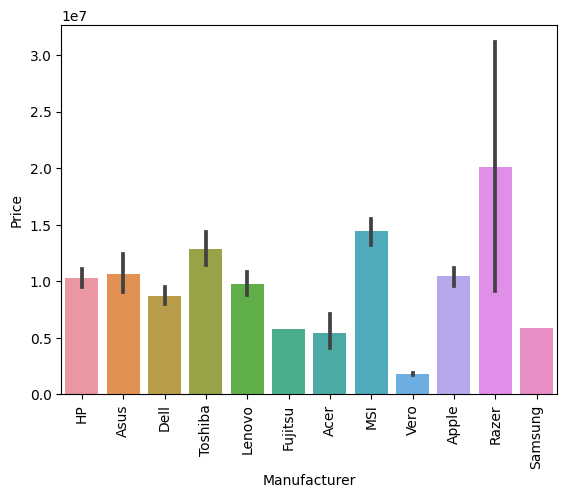

In [551]:
sn.barplot(data=df,x='Manufacturer',y='Price')
mp.xticks(rotation='vertical')

In [552]:
df=df[df['Manufacturer']!='Fujitsu']
df=df[df['Manufacturer']!='Samsung']


In [553]:
df['Manufacturer'].unique()

array(['HP', 'Asus', 'Dell', 'Toshiba', 'Lenovo', 'Acer', 'MSI', 'Vero',
       'Apple', 'Razer'], dtype=object)

In [554]:
df['Operating System'].unique()

array(['Windows', 'No OS', 'Chrome OS', 'Mac OS', 'Linux', 'Android'],
      dtype=object)

In [555]:
df['Operating System'].value_counts()

Windows      572
No OS         28
Linux         28
Chrome OS      8
Mac OS         8
Android        2
Name: Operating System, dtype: int64

In [556]:
df['Model Name'].unique()

array(['15-bs053od (i7-7500U/6GB/1TB/W10)', 'Rog GL753VE-DS74',
       'Inspiron 7579', 'Portege Z30-C-1CV', 'IdeaPad 320-15ABR',
       'Tecra A40-C-1KF', 'Inspiron 3567', 'Probook 450',
       'Legion Y520-15IKBN', 'Inspiron 5567', 'Latitude 5480',
       'EliteBook Folio', '15-bs005nv (i3-6006U/4GB/1TB',
       'V110-15IAP (N3350/4GB/128GB/No', 'ThinkPad T560', 'Inspiron 5378',
       'ZenBook UX310UA-FB485T', 'Spectre 13-V111dx', 'Aspire ES1-533',
       'Rog GL553VE-DS74', 'EliteBook 840', 'Nitro 5', 'ENVY -',
       'Vostro 3568', 'Probook 440', 'Portege Z30-C-16H', 'ProBook 640',
       'EliteBook 1040', 'ProBook 440', 'Inspiron 7567', 'EliteBook 820',
       'Elitebook 840', 'Probook 430', 'Portege A30-C-1CZ', 'ProBook 450',
       'ThinkPad P70', 'Tecra Z40-C-12Z', 'Inspiron 5568',
       'Portégé Z30-C-16K', 'Spectre 13-V100nv', 'Latitude E5570',
       'Elitebook 820', 'ProBook 650', 'XPS 13', 'Probook 470',
       'Aspire 3', 'GL72M 7RDX', 'Probook 640', 'EliteBook 850',
  

In [557]:
df['Model Name'].value_counts()

Inspiron 3567                        18
XPS 13                               16
EliteBook 840                        14
Inspiron 5567                        12
IdeaPad Y700-15ISK                   12
                                     ..
Inspiron 5370                         2
Aspire F5-573G                        2
GS70 Stealth                          2
G752VY-GC162T (i7-6700HQ/16GB/1TB     2
EliteBook 1030                        2
Name: Model Name, Length: 195, dtype: int64

In [558]:
df['Category'].unique()

array(['Notebook', 'Gaming', '2 in 1 Convertible', 'Netbook', 'Ultrabook',
       'Workstation'], dtype=object)

In [559]:
df['Category'].value_counts()

Notebook              354
Gaming                110
Ultrabook              88
2 in 1 Convertible     68
Netbook                16
Workstation            10
Name: Category, dtype: int64

In [560]:
df['Screen Size'].unique()

array(['15.6"', '17.3"', '13.3"', '14.0"', '12.5"', '11.6"', '12.0"',
       '10.1"', '15.0"'], dtype=object)

In [561]:
df['Screen Size']=df['Screen Size'].str.replace('"',"")

In [562]:
df['Screen Size'].value_counts()

15.6    338
14.0    102
13.3     82
17.3     66
12.5     32
11.6     12
12.0      6
10.1      6
15.0      2
Name: Screen Size, dtype: int64

In [563]:
df['Screen Size']=df['Screen Size'].astype(float)

In [564]:
df['Storage'].unique()

array(['1TB HDD', '256GB SSD +  1TB HDD', '512GB SSD', '128GB SSD',
       '256GB SSD', '500GB HDD', '128GB SSD +  1TB HDD', '1TB Hybrid',
       '32GB Flash Storage', '256GB SSD +  500GB HDD',
       '16GB Flash Storage', '1TB SSD', '2TB HDD', '256GB Flash Storage',
       '512GB SSD +  1TB Hybrid', '64GB Flash Storage', '1GB SSD',
       '16GB SSD', '256GB SSD +  1TB Hybrid', '512GB SSD +  1TB HDD',
       '512GB Flash Storage', '32GB SSD'], dtype=object)

In [565]:
df['Storage'].value_counts()

256GB SSD                  416
1TB HDD                     53
500GB HDD                   53
512GB SSD                   27
128GB SSD +  1TB HDD        23
256GB SSD +  1TB HDD        21
128GB SSD                   14
1TB Hybrid                   8
32GB Flash Storage           8
64GB Flash Storage           6
256GB Flash Storage          3
1TB SSD                      3
2TB HDD                      2
16GB Flash Storage           1
512GB SSD +  1TB Hybrid      1
256GB SSD +  500GB HDD       1
1GB SSD                      1
16GB SSD                     1
256GB SSD +  1TB Hybrid      1
512GB SSD +  1TB HDD         1
512GB Flash Storage          1
32GB SSD                     1
Name: Storage, dtype: int64

In [566]:
df['RAM'].unique()

array(['6GB', '16GB', '12GB', '4GB', '8GB', '2GB', '64GB', '32GB'],
      dtype=object)

In [567]:
df['RAM'].value_counts()

8GB     272
4GB     204
16GB    100
6GB      34
2GB      24
12GB      8
64GB      2
32GB      2
Name: RAM, dtype: int64

<Axes: xlabel='Model Name', ylabel='Price'>

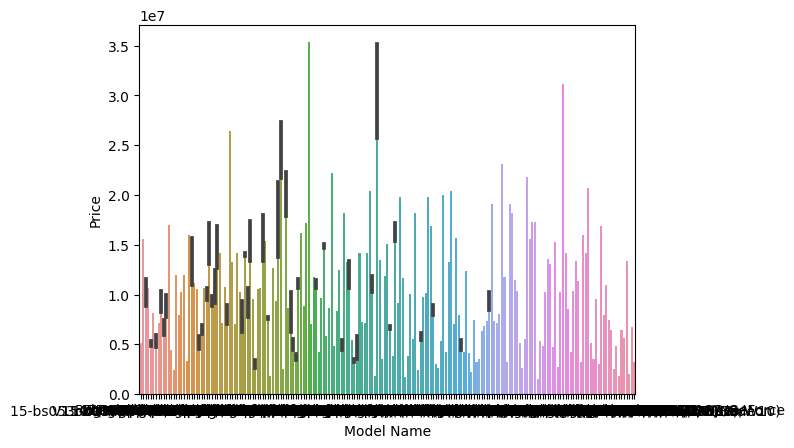

In [568]:
sn.barplot(data=df,x='Model Name',y='Price')

In [569]:
df.drop('Model Name',axis=1,inplace=True)

In [570]:
df.head(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0


<Axes: xlabel='Manufacturer', ylabel='Price'>

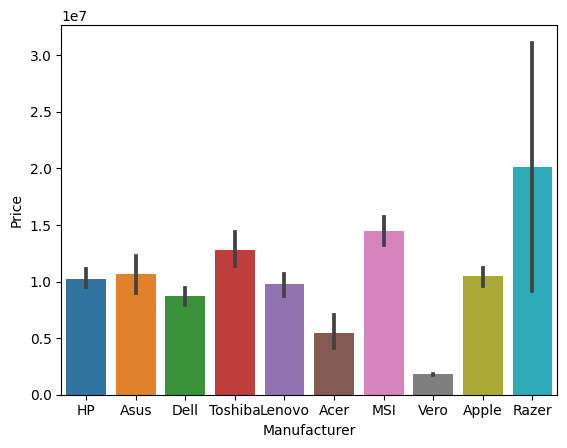

In [571]:
sn.barplot(data=df,x='Manufacturer',y='Price')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Notebook'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, '2 in 1 Convertible'),
  Text(3, 0, 'Netbook'),
  Text(4, 0, 'Ultrabook'),
  Text(5, 0, 'Workstation')])

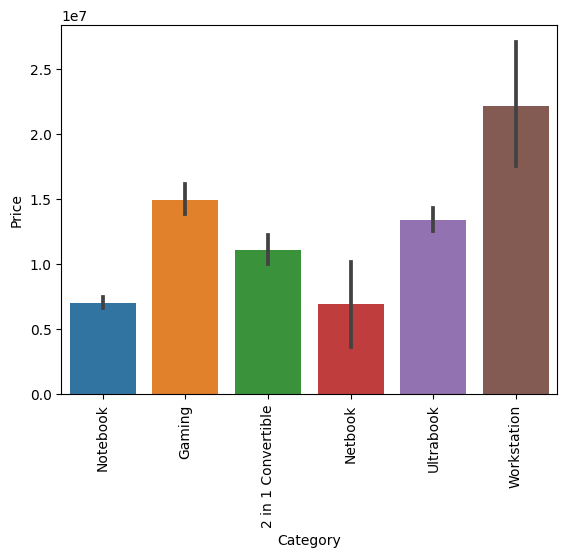

In [572]:
sn.barplot(data=df,x='Category',y='Price')
mp.xticks(rotation='vertical')

<Axes: xlabel='Screen Size', ylabel='Price'>

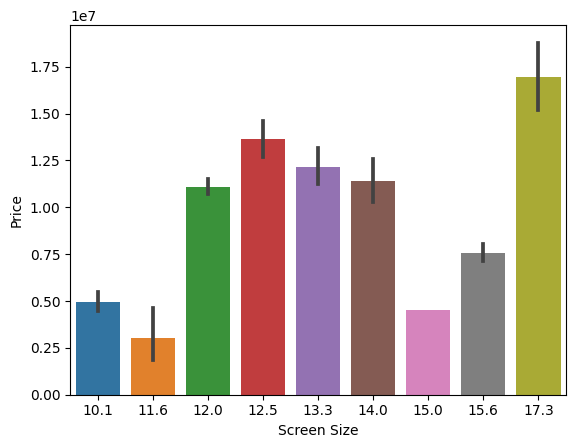

In [573]:
sn.barplot(data=df,x='Screen Size',y='Price')

<Axes: xlabel='RAM', ylabel='Price'>

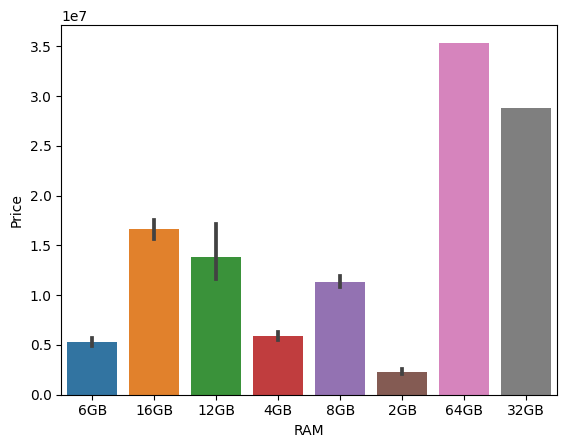

In [574]:
sn.barplot(data=df,x='RAM',y='Price')

In [575]:
df.head(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, '2.04kg'),
  Text(1, 0, '2.99kg'),
  Text(2, 0, '2.19kg'),
  Text(3, 0, '1.2kg'),
  Text(4, 0, '2.2kg'),
  Text(5, 0, '1.75kg'),
  Text(6, 0, '2.25kg'),
  Text(7, 0, '2.5kg'),
  Text(8, 0, '2.36kg'),
  Text(9, 0, '1.6kg'),
  Text(10, 0, '0.97kg'),
  Text(11, 0, '2.1kg'),
  Text(12, 0, '1.9kg'),
  Text(13, 0, '2.3kg'),
  Text(14, 0, '1.68kg'),
  Text(15, 0, '1.4kg'),
  Text(16, 0, '1.11kg'),
  Text(17, 0, '2.4kg'),
  Text(18, 0, '1.48kg'),
  Text(19, 0, '2.7kg'),
  Text(20, 0, '1.34kg'),
  Text(21, 0, '2.18kg'),
  Text(22, 0, '1.64kg'),
  Text(

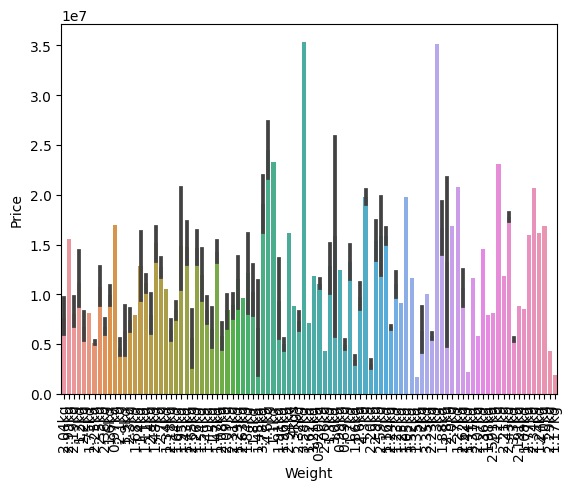

In [576]:
sn.barplot(data=df,x='Weight',y='Price')
mp.xticks(rotation='vertical')

In [577]:
df['Weight']=df['Weight'].apply(lambda x:(x.replace("kg","")))

In [578]:
df['Weight']=df['Weight'].apply(lambda x:(x.replace("s",""))).astype(float)


In [579]:
df['Weight'].unique()

array([2.04 , 2.99 , 2.19 , 1.2  , 2.2  , 1.75 , 2.25 , 2.5  , 2.36 ,
       1.6  , 0.97 , 2.1  , 1.9  , 2.3  , 1.68 , 1.4  , 1.11 , 2.4  ,
       1.48 , 2.7  , 1.34 , 2.18 , 1.64 , 1.95 , 1.43 , 2.65 , 1.26 ,
       1.54 , 1.49 , 1.5  , 1.47 , 2.08 , 2.09 , 2.31 , 1.29 , 2.63 ,
       1.84 , 1.8  , 1.45 , 3.78 , 4.6  , 1.1  , 1.91 , 1.96 , 2.94 ,
       4.   , 2.32 , 3.58 , 1.62 , 3.21 , 0.92 , 2.06 , 1.3  , 3.   ,
       0.99 , 0.69 , 1.7  , 1.86 , 2.6  , 4.3  , 2.9  , 2.59 , 1.16 ,
       2.24 , 1.23 , 1.25 , 1.05 , 3.52 , 1.35 , 2.   , 3.35 , 2.23 ,
       1.88 , 2.8  , 1.27 , 2.62 , 1.44 , 3.31 , 2.07 , 1.36 , 1.98 ,
       2.591, 4.2  , 2.21 , 2.43 , 3.3  , 2.191, 1.08 , 2.77 , 2.34 ,
       1.24 , 2.29 , 1.17 ])

In [580]:
df.head(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0


In [581]:
df['Touchscreen']=df['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0).astype(int)

In [582]:
df.head(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen
0,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0
1,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0
2,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1


In [583]:
df['Touchscreen'].value_counts()

0    548
1     98
Name: Touchscreen, dtype: int64

<Axes: xlabel='Touchscreen'>

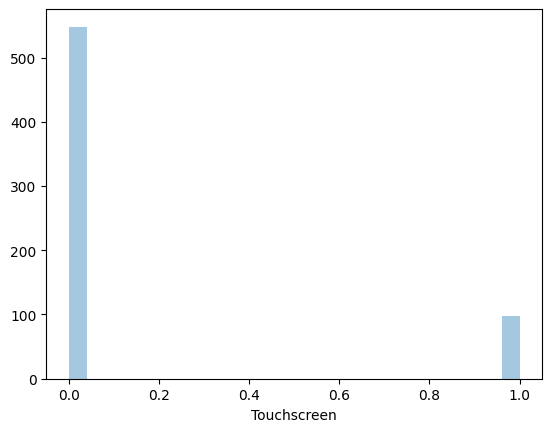

In [584]:
sn.distplot(df['Touchscreen'],kde=False)

<Axes: xlabel='Touchscreen', ylabel='Price'>

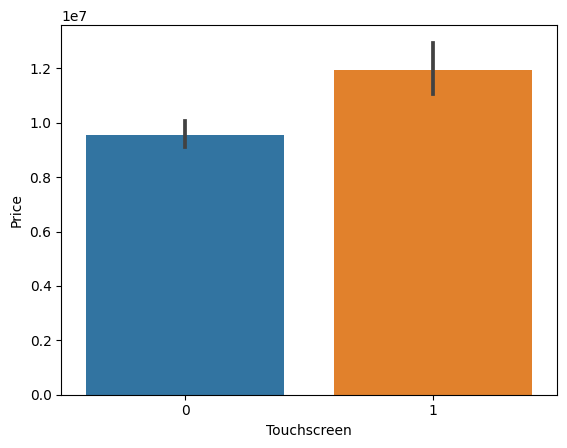

In [585]:
sn.barplot(data=df,x='Touchscreen',y='Price')

In [586]:
df['Ips']=df['Screen'].apply(lambda x: 1 if 'IPS' in x else 0).astype(int)

In [587]:
df['Ips'].value_counts()

0    478
1    168
Name: Ips, dtype: int64

<Axes: xlabel='Ips', ylabel='Count'>

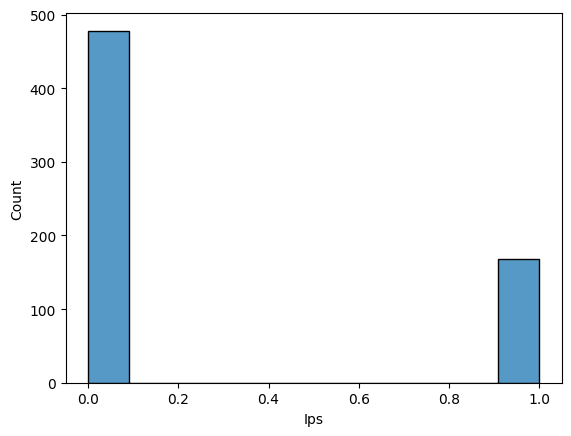

In [588]:
sn.histplot(df['Ips'],kde=False)

<Axes: xlabel='Ips', ylabel='Price'>

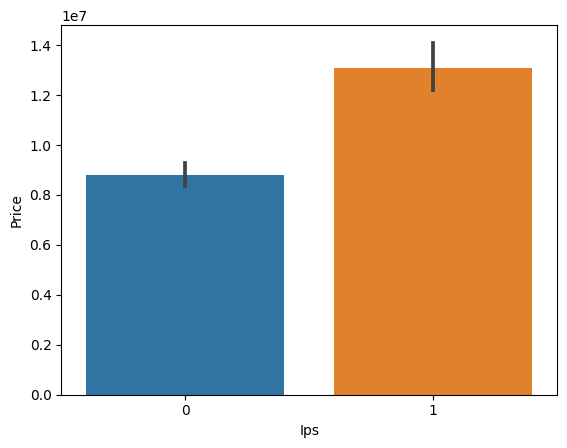

In [589]:
sn.barplot(data=df,x='Ips',y='Price')

In [590]:
df.head(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips
0,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0,0,0
1,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0,0,0
2,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0,1,1


In [591]:
df['Screen'].unique()

array(['1366x768', 'Full HD 1920x1080',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Full HD 1920x1080', 'Full HD / Touchscreen 1920x1080',
       'Quad HD+ 3200x1800', 'IPS Panel 4K Ultra HD 3840x2160',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 2560x1440',
       '4K Ultra HD 3840x2160', 'IPS Panel Retina Display 2304x1440',
       '1600x900', 'IPS Panel Touchscreen 2560x1440',
       'IPS Panel Touchscreen 1920x1200',
       'Touchscreen / 4K Ultra HD 3840x2160', 'Touchscreen 2560x1440',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', '2560x1440',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800'], dtype=object)

In [592]:
sam=df['Screen'].str.split("x",n=1,expand=True)

In [593]:
df['x_sam']=sam[0]
df['y_sam']=sam[1]

In [594]:
df.sample(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,x_sam,y_sam
52,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows,10,1.64,8651916.0,0,0,1366,768
20,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.50,15996708.0,0,0,Full HD 1920,1080
294,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,256GB SSD,Intel HD Graphics,Windows,10,1.50,2036268.0,0,0,1366,768


In [595]:
df['x_sam']=df['x_sam'].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [596]:
df.sample(2)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,x_sam,y_sam
185,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,2.20,4081428.0,0,0,1366,768
209,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Nvidia GeForce 940MX,Windows,10,2.23,6144372.0,0,0,1920,1080


In [597]:
df['x_sam']=df['x_sam'].astype(int)
df['y_sam']=df['y_sam'].astype(int)

In [598]:
df['Screen Size'].dtype

dtype('float64')

In [599]:
df.corr()['Price']

Screen Size    0.041609
Weight         0.163632
Price          1.000000
Touchscreen    0.143720
Ips            0.316008
x_sam          0.487433
y_sam          0.481518
Name: Price, dtype: float64

In [600]:
df['PPI']=(((df['x_sam']**2)+(df['y_sam']**2))**0.5/df['Screen Size']).astype(float)

In [601]:
df.sample(3)

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,x_sam,y_sam,PPI
303,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Linux,10,2.3,7166863.08,0,0,1366,768,100.454670
162,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,2.8,21696480.00,1,1,2560,1440,209.800683
108,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD FirePro W4190M,Windows,7,1.9,13293540.00,0,0,1920,1080,141.211998


In [602]:
df['PPI'].unique()

array([100.45466986, 127.33567457, 141.21199808, 165.63211805,
       111.93520356, 157.35051215, 176.23257361, 276.05353009,
       117.82653006, 254.67134914, 125.36742799, 135.09421119,
       209.80068286, 282.42399616, 226.41554717, 106.11306214,
       234.97676481, 224.17380908, 331.2642361 , 352.46514721,
       220.84282407, 146.86047801])

In [603]:
df['PPI'].dtype

dtype('float64')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '100.45466986113651'),
  Text(1, 0, '106.11306214269258'),
  Text(2, 0, '111.93520355955211'),
  Text(3, 0, '117.82653006268643'),
  Text(4, 0, '125.36742798669837'),
  Text(5, 0, '127.33567457123111'),
  Text(6, 0, '135.0942111925629'),
  Text(7, 0, '141.21199808219862'),
  Text(8, 0, '146.86047800548656'),
  Text(9, 0, '157.3505121487356'),
  Text(10, 0, '165.6321180513006'),
  Text(11, 0, '176.23257360658386'),
  Text(12, 0, '209.8006828649808'),
  Text(13, 0, '220.84282406840083'),
  Text(14, 0, '224.17380907857276'),
  Text(15, 0, '226.41554716935852'),
  Text(16, 0, '234.9767648087785'),
  Text(17, 0, '254.67134914246222'),
  Text(18, 0, '276.053530085501'),
  Text(19, 0, '282.42399616439724'),
  Text(20, 0, '331.2642361026012'),
  Text(21, 0, '352.4651472131677')])

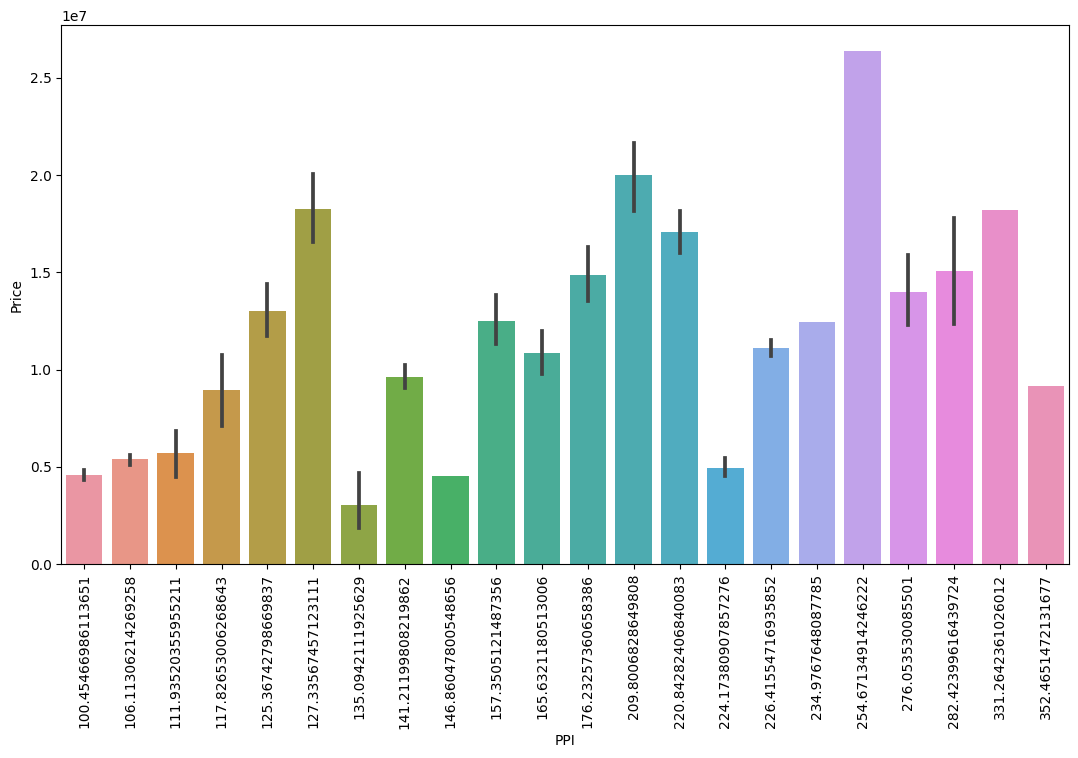

In [604]:
mp.figure(figsize=(13,7))
sn.barplot(data=df,x='PPI',y='Price')
mp.xticks(rotation='vertical')

In [605]:
df.drop(['x_sam','y_sam','Screen','Screen Size'],axis=1,inplace=True)

In [606]:
df.sample(5)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI
19,Acer,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows,10,2.40,3378960.0,0,0,100.454670
269,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD,Nvidia GeForce GTX 1070,Windows,10,2.34,20673900.0,0,1,141.211998
102,Lenovo,Ultrabook,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows,10,0.99,12439908.0,1,1,234.976765
259,Dell,Notebook,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows,7,2.24,6553404.0,0,0,100.454670
191,MSI,Gaming,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows,10,2.20,7460388.0,0,1,141.211998


In [607]:
df['RAM']=df['RAM'].str.replace("GB"," ").astype(int)

In [608]:
df['RAM'].dtype

dtype('int32')

In [609]:
df.sample(5)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI
206,HP,Notebook,Intel Core i7 6700HQ 2.6GHz,6,256GB SSD,Nvidia GeForce GTX 960M,Windows,10,2.18,7104708.0,0,1,141.211998
131,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD,Nvidia GeForce GTX 960M,Windows,10,2.59,11906388.0,0,1,141.211998
212,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows,10,2.40,7282548.0,0,1,141.211998
78,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,10,1.96,4437108.0,0,0,100.454670
79,Acer,Notebook,AMD A8-Series 7410 2.2GHz,8,256GB SSD,AMD Radeon R5,Windows,10,2.40,3992508.0,0,0,100.454670


In [610]:
df['Storage'].value_counts()

256GB SSD                  416
1TB HDD                     53
500GB HDD                   53
512GB SSD                   27
128GB SSD +  1TB HDD        23
256GB SSD +  1TB HDD        21
128GB SSD                   14
1TB Hybrid                   8
32GB Flash Storage           8
64GB Flash Storage           6
256GB Flash Storage          3
1TB SSD                      3
2TB HDD                      2
16GB Flash Storage           1
512GB SSD +  1TB Hybrid      1
256GB SSD +  500GB HDD       1
1GB SSD                      1
16GB SSD                     1
256GB SSD +  1TB Hybrid      1
512GB SSD +  1TB HDD         1
512GB Flash Storage          1
32GB SSD                     1
Name: Storage, dtype: int64

In [611]:
df['CPU_name']=df['CPU'].apply(lambda x: " ".join(x.split()[0:3]))

In [612]:
df.sample(3)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_name
28,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows,10,1.95,10714860.0,0,0,157.350512,Intel Core i5
151,HP,Gaming,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,3.35,10039068.0,0,1,127.335675,Intel Core i5
19,Acer,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,256GB SSD,Intel HD Graphics 505,Windows,10,2.40,3378960.0,0,0,100.454670,Intel Pentium Quad


In [613]:
def cham(x):
    if x=='Intel Core i3' or x=='Intel Core i5'or x=='Intel Core i7':
        return x
    else:
        if x.split()[0]=='Intel':
            return 'Other Intel processor'
        else:
            return 'AMD Processor'

    

In [614]:
df['CPU_bra']=df['CPU_name'].apply(cham)

In [615]:
df['Storage'].unique()

array(['1TB HDD', '256GB SSD +  1TB HDD', '512GB SSD', '128GB SSD',
       '256GB SSD', '500GB HDD', '128GB SSD +  1TB HDD', '1TB Hybrid',
       '32GB Flash Storage', '256GB SSD +  500GB HDD',
       '16GB Flash Storage', '1TB SSD', '2TB HDD', '256GB Flash Storage',
       '512GB SSD +  1TB Hybrid', '64GB Flash Storage', '1GB SSD',
       '16GB SSD', '256GB SSD +  1TB Hybrid', '512GB SSD +  1TB HDD',
       '512GB Flash Storage', '32GB SSD'], dtype=object)

In [616]:
df.sample(3)

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_name,CPU_bra
223,Lenovo,Notebook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,10,2.20,5593068.0,0,0,100.454670,Intel Core i7,Intel Core i7
253,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows,10,1.95,31113108.0,0,0,157.350512,Intel Core i7,Intel Core i7
53,Acer,Notebook,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows,10,2.10,3636828.0,0,0,100.454670,AMD A9-Series 9420,AMD Processor


In [617]:
df['CPU_bra'].unique()

array(['Intel Core i7', 'Intel Core i5', 'AMD Processor',
       'Other Intel processor', 'Intel Core i3'], dtype=object)

In [618]:
df.drop(['CPU','CPU_name'],axis=1,inplace=True)

In [619]:
df.sample(3)

,Manufacturer,Category,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_bra
106,Dell,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows,10,2.18,6669000.0,0,0,141.211998,Intel Core i5
66,HP,Notebook,4,256GB SSD,Intel HD Graphics 520,Windows,10,1.54,8892000.0,0,0,157.350512,Intel Core i5
171,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 520,Windows,10,1.27,20798388.0,1,1,209.800683,Intel Core i7


In [620]:
df['CPU_bra']=df['CPU_bra'].apply(lambda x: x.replace(" ","")).astype(str)

In [621]:
df['GPU'].unique()

array(['Intel HD Graphics 620', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 520', 'AMD Radeon 530', 'AMD Radeon R5 M430',
       'Nvidia GeForce GTX 1060', 'AMD Radeon R7 M445',
       'Intel HD Graphics 620 ', 'Intel HD Graphics 515',
       'AMD Radeon 520', 'Intel HD Graphics 500', 'Intel HD Graphics 505',
       'Nvidia GeForce GTX 1050', 'Nvidia GeForce 930MX',
       'Nvidia Quadro 3000M', 'AMD Radeon R5', 'Intel HD Graphics 400',
       'Nvidia GeForce 930M', 'Nvidia GeForce GTX 980M',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 965M',
       'Intel HD Graphics', 'Nvidia GeForce GTX 980 ',
       'Nvidia GeForce GTX 970M', 'AMD Radeon R5 M330',
       'Nvidia GeForce GTX 950M', 'Nvidia GeForce GTX 1070',
       'AMD FirePro W4190M', 'Intel HD Graphics 405',
       'AMD FirePro W6150M', 'Nvidia GeForce GTX 960M', 'AMD Radeon R4',
       'AMD Radeon R5 M315', 'Intel Iris Plus Graphics 640',
       'Nvidia Quadro M500M', 'AMD Radeon R7 M360',
       'Nvidia Quadr

In [622]:
df['GPU_br']=df['GPU'].apply(lambda x:" ".join(x.split()[:1])).astype(str)

In [623]:
df['GPU_br'].value_counts()

Intel     392
Nvidia    178
AMD        76
Name: GPU_br, dtype: int64

In [624]:
df['GPU_br'].unique()

array(['Intel', 'Nvidia', 'AMD'], dtype=object)

In [625]:
df.drop('GPU',axis=1,inplace=True)

<Axes: xlabel='GPU_br', ylabel='Price'>

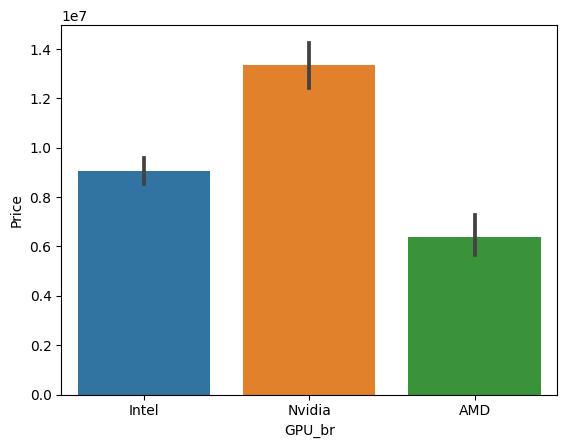

In [626]:
sn.barplot(data=df,x='GPU_br',y='Price')

In [627]:
df['Storage'].unique()

array(['1TB HDD', '256GB SSD +  1TB HDD', '512GB SSD', '128GB SSD',
       '256GB SSD', '500GB HDD', '128GB SSD +  1TB HDD', '1TB Hybrid',
       '32GB Flash Storage', '256GB SSD +  500GB HDD',
       '16GB Flash Storage', '1TB SSD', '2TB HDD', '256GB Flash Storage',
       '512GB SSD +  1TB Hybrid', '64GB Flash Storage', '1GB SSD',
       '16GB SSD', '256GB SSD +  1TB Hybrid', '512GB SSD +  1TB HDD',
       '512GB Flash Storage', '32GB SSD'], dtype=object)

In [628]:
df['Storage']=df['Storage'].str.replace("GB"," ")

In [629]:
df['Storage']=df['Storage'].str.replace("TB","000")

In [630]:
nxt=df['Storage'].str.split('+',n=1,expand=True)

In [631]:
nxt[1]

0            None
1        1000 HDD
2            None
3            None
4            None
          ...    
320          None
321          None
322          None
323          None
324          None
Name: 1, Length: 646, dtype: object

In [632]:
nxt[0]=nxt[0].astype(str)

In [633]:
nxt[1]=nxt[1].astype(str)

In [634]:
def hdd(x):
    l=[]
    for i in x:
        if 'HDD'in x:
            l.append(i)       
    return "".join(l)  


def ssd(x):
    m=[]
    for i in x:
        if 'SSD'in x:
            m.append(i)       
    return "".join(m)
    

def hybrid(x):
    m=[]
    for i in x:
        if 'Hybrid'in x:
            m.append(i)       
    return "".join(m)    



def flas_st(x):
    m=[]
    for i in x:
        if 'Flash Storage'in x:
            m.append(i)
          
                   
    return "".join(m)    

        

In [635]:
df['SSD1']=nxt[0].apply(ssd)
df['HDD1']=nxt[0].apply(hdd)
df['Hybrid1']=nxt[0].apply(hybrid)
df['flash_st1']=nxt[0].apply(flas_st)

In [636]:
df['Hybrid1'].values

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '1000 Hybrid', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '1000 Hybrid', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '1000 Hybrid', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '1000 Hybrid', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', ''

In [637]:
df['flash_st1']

0       
1       
2       
3       
4       
      ..
320     
321     
322     
323     
324     
Name: flash_st1, Length: 646, dtype: object

In [638]:
df['SSD1']=df['SSD1']
df['HDD1']=df['HDD1']
df['Hybrid1']=df['Hybrid1']
df['flash_st1']=df['flash_st1']

In [639]:
df['HDD2']=nxt[1].apply(hdd)
df['SSD2']=nxt[1].apply(ssd)
df['Hybrid2']=nxt[1].apply(hybrid)
df['flash_st2']=nxt[1].apply(flas_st)

In [640]:
df['HDD']=df['HDD1']+df['HDD2']
df['SSD']=df['SSD1']+df['SSD2']
df['Hybrid']=df['Hybrid1']+df['Hybrid2']
df['flash_st']=df['flash_st1']+df['flash_st2']


In [641]:
df['HDD']=df['HDD'].apply(lambda x: x if 'HDD' in x else 0).astype(str)
df['SSD']=df['SSD'].apply(lambda x: x if 'SSD' in x else 0).astype(str)
df['Hybrid']=df['Hybrid'].apply(lambda x: x if 'Hybrid' in x else 0).astype(str)
df['flash_st']=df['flash_st'].apply(lambda x: x if 'Flash' in x else 0).astype(str)

In [642]:
df.head(3)

,Manufacturer,Category,RAM,Storage,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,...,Hybrid1,flash_st1,HDD2,SSD2,Hybrid2,flash_st2,HDD,SSD,Hybrid,flash_st
0,HP,Notebook,6,1000 HDD,Windows,10,2.04,5148468.0,0,0,...,,,,,,,1000 HDD,0,0,0
1,Asus,Gaming,16,256 SSD + 1000 HDD,Windows,10,2.99,15552108.0,0,0,...,,,1000 HDD,,,,1000 HDD,256 SSD,0,0
2,Dell,2 in 1 Convertible,12,512 SSD,Windows,10,2.19,11550708.0,1,1,...,,,,,,,0,512 SSD,0,0


In [643]:
df.drop(['Storage','SSD1','HDD1','Hybrid1','flash_st1','SSD2',
'HDD2','Hybrid2','flash_st2'],axis=1,inplace=True)

In [644]:
df['HDD']=df['HDD'].apply(lambda x: " ".join(x.split()[0:1])).astype(int)
df['SSD']=df['SSD'].apply(lambda x: " ".join(x.split()[0:1])).astype(int)
df['Hybrid']=df['Hybrid'].apply(lambda x: " ".join(x.split()[0:1])).astype(int)
df['flash_st']=df['flash_st'].apply(lambda x: " ".join(x.split()[0:1])).astype(int)

In [645]:
df

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_bra,GPU_br,HDD,SSD,Hybrid,flash_st
0,HP,Notebook,6,Windows,10,2.04,5148468.0,0,0,100.454670,IntelCorei7,Intel,1000,0,0,0
1,Asus,Gaming,16,Windows,10,2.99,15552108.0,0,0,127.335675,IntelCorei7,Nvidia,1000,256,0,0
2,Dell,2 in 1 Convertible,12,Windows,10,2.19,11550708.0,1,1,141.211998,IntelCorei7,Intel,0,512,0,0
3,Toshiba,Notebook,4,Windows,7,1.20,10625940.0,0,0,165.632118,IntelCorei5,Intel,0,128,0,0
4,Lenovo,Notebook,6,Windows,10,2.20,4881708.0,0,0,141.211998,AMDProcessor,AMD,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,2 in 1 Convertible,4,Windows,10,1.80,5673096.0,1,1,157.350512,IntelCorei7,Intel,0,256,0,0
321,Lenovo,2 in 1 Convertible,16,Windows,10,1.30,13329108.0,1,1,276.053530,IntelCorei7,Intel,0,256,0,0
322,Lenovo,Notebook,2,Windows,10,1.50,2036268.0,0,0,111.935204,OtherIntelprocessor,Intel,0,256,0,0
323,HP,Notebook,6,Windows,10,2.19,6793488.0,0,0,100.454670,IntelCorei7,AMD,0,256,0,0


In [646]:
df.corr()['Price']

RAM            0.684341
Weight         0.163632
Price          1.000000
Touchscreen    0.143720
Ips            0.316008
PPI            0.402361
HDD           -0.085818
SSD            0.444158
Hybrid         0.019581
flash_st      -0.034020
Name: Price, dtype: float64

In [647]:
df.drop(['Hybrid','flash_st'],axis=1,inplace=True)

In [648]:
df.sample(4)

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_bra,GPU_br,HDD,SSD
150,Lenovo,Gaming,8,No OS,10,2.40,8794188.0,0,1,141.211998,IntelCorei5,Nvidia,0,256
168,HP,Ultrabook,8,Windows,7,1.26,20424479.4,0,0,176.232574,IntelCorei7,Intel,0,256
225,Dell,Ultrabook,16,Windows,10,1.20,23830560.0,1,0,276.053530,IntelCorei7,Intel,0,512
122,Dell,Ultrabook,4,Windows,7,1.50,10093753.8,0,0,125.367428,IntelCorei3,Intel,0,256


In [649]:
df.columns

Index(['Manufacturer', 'Category', 'RAM', 'Operating System',
       'Operating System Version', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'PPI', 'CPU_bra', 'GPU_br', 'HDD', 'SSD'],
      dtype='object')

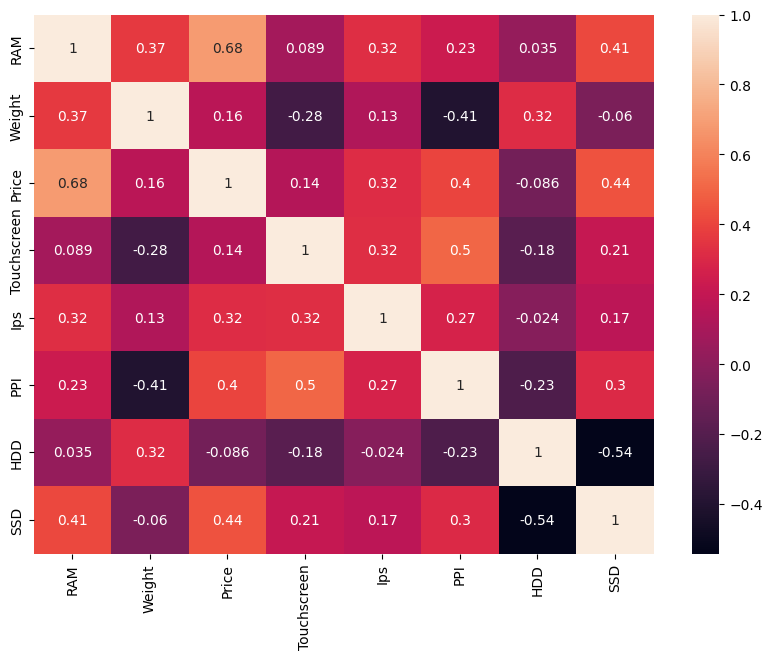

In [650]:
mp.figure(figsize=(10,7))
sn.heatmap(df.corr(),annot=True)
mp.xticks(rotation='vertical')
mp.show()

In [651]:
x=df.drop(['Price'],axis=1)
y=np.log(df['Price'])

In [652]:
x

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Touchscreen,Ips,PPI,CPU_bra,GPU_br,HDD,SSD
0,HP,Notebook,6,Windows,10,2.04,0,0,100.454670,IntelCorei7,Intel,1000,0
1,Asus,Gaming,16,Windows,10,2.99,0,0,127.335675,IntelCorei7,Nvidia,1000,256
2,Dell,2 in 1 Convertible,12,Windows,10,2.19,1,1,141.211998,IntelCorei7,Intel,0,512
3,Toshiba,Notebook,4,Windows,7,1.20,0,0,165.632118,IntelCorei5,Intel,0,128
4,Lenovo,Notebook,6,Windows,10,2.20,0,0,141.211998,AMDProcessor,AMD,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,2 in 1 Convertible,4,Windows,10,1.80,1,1,157.350512,IntelCorei7,Intel,0,256
321,Lenovo,2 in 1 Convertible,16,Windows,10,1.30,1,1,276.053530,IntelCorei7,Intel,0,256
322,Lenovo,Notebook,2,Windows,10,1.50,0,0,111.935204,OtherIntelprocessor,Intel,0,256
323,HP,Notebook,6,Windows,10,2.19,0,0,100.454670,IntelCorei7,AMD,0,256


In [653]:
y

0      15.454210
1      16.559707
2      16.262257
3      16.178809
4      15.401006
         ...    
320    15.551246
321    16.405461
322    14.526629
323    15.731475
324    15.003704
Name: Price, Length: 646, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

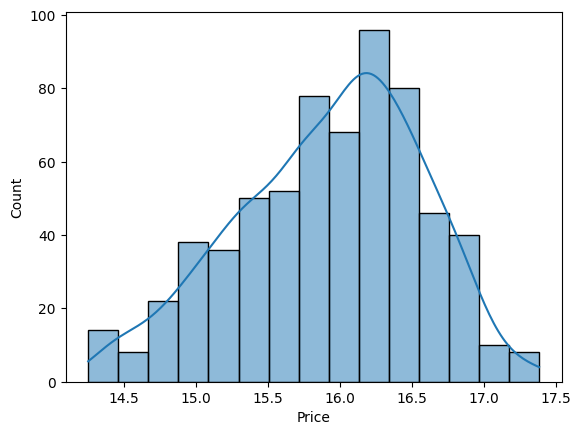

In [654]:
sn.histplot(y,kde=True,fill=True)

In [655]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [656]:
print(f"The shape of the x_train is :  {x_train.shape}")
print(f"The shape of the x_test is :  {x_test.shape}")
print(f"The shape of the y_train is :  {y_train.shape}")
print(f"The shape of the y_test is :  {y_test.shape}")

The shape of the x_train is :  (516, 13)
The shape of the x_test is :  (130, 13)
The shape of the y_train is :  (516,)
The shape of the y_test is :  (130,)


In [657]:
x_test

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Touchscreen,Ips,PPI,CPU_bra,GPU_br,HDD,SSD
312,Dell,Notebook,6,Windows,10,2.30,0,0,100.454670,IntelCorei3,Intel,0,256
45,HP,Notebook,8,Windows,10,1.64,0,0,157.350512,IntelCorei7,Nvidia,0,256
16,Dell,2 in 1 Convertible,8,Windows,10,1.68,1,0,165.632118,IntelCorei5,Intel,0,256
294,Lenovo,Notebook,2,Windows,10,1.50,0,0,111.935204,OtherIntelprocessor,Intel,0,0
73,HP,Notebook,8,Windows,10,1.91,0,1,141.211998,IntelCorei7,Nvidia,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,HP,2 in 1 Convertible,8,Windows,10,1.48,1,0,165.632118,IntelCorei5,Intel,0,256
217,HP,Notebook,12,Windows,10,2.21,0,1,141.211998,IntelCorei7,Nvidia,1000,128
288,HP,Notebook,6,Windows,10,2.04,0,0,141.211998,AMDProcessor,AMD,0,256
136,Lenovo,2 in 1 Convertible,4,Android,10,0.69,1,1,224.173809,OtherIntelprocessor,Intel,0,0


In [658]:
df.head(1)

,Manufacturer,Category,RAM,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,CPU_bra,GPU_br,HDD,SSD
0,HP,Notebook,6,Windows,10,2.04,5148468.0,0,0,100.45467,IntelCorei7,Intel,1000,0


In [659]:
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('tf1',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9,10]),
                                   ('tf2',StandardScaler(),[2,7,6,8,11,12])
                                  ],remainder='passthrough')
lr=LinearRegression()
pipe=Pipeline([
    ('st1',ct),
    ('st2',lr)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', LinearRegression())])

In [660]:
y_pred=pipe.predict(x_test)
x_pred=pipe.predict(x_train)

In [661]:
print(f"The r2_score of test is {r2_score(y_pred,y_test)}")
print(f"The r2_score of training is {r2_score(x_pred,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(y_pred,y_test))}")

The r2_score of test is 0.7993001134229345
The r2_score of training is 0.8008763935125968
The mean absolute error is 0.19357807106176342


In [662]:
rfc=RandomForestRegressor(n_estimators=1000)
pipe=Pipeline([
    ('st1',ct),
    ('st2',rfc)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', RandomForestRegressor(n_estimators=1000))])

In [663]:
ypr=pipe.predict(x_test)
xpr=pipe.predict(x_train)

In [664]:
print(f"The r2_score of test is {r2_score(ypr,y_test)}")
print(f"The r2_score of training is {r2_score(xpr,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(ypr,y_test))}")

The r2_score of test is 0.958069149450725
The r2_score of training is 0.9901872761404196
The mean absolute error is 0.09017055642080692


In [665]:
dt=DecisionTreeRegressor()
pipe=Pipeline([
    ('st1',ct),
    ('st2',dt)
    ])
pipe.fit(x_train,y_train)


Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', DecisionTreeRegressor())])

In [666]:
y_pr=pipe.predict(x_test)
x_pr=pipe.predict(x_train)

In [667]:
print(f"The r2_score of test is {r2_score(y_pr,y_test)}")
print(f"The r2_score of training is {r2_score(x_pr,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(y_pr,y_test))}")

The r2_score of test is 0.9686642551141281
The r2_score of training is 0.997720923725034
The mean absolute error is 0.05430017108271613


In [668]:
adt=AdaBoostRegressor()
pipe=Pipeline([
    ('st1',ct),
    ('st2',adt)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', AdaBoostRegressor())])

In [669]:
y_p_r=pipe.predict(x_test)
x_p_r=pipe.predict(x_train)

In [670]:
print(f"The r2_score of test is {r2_score(y_p_r,y_test)}")
print(f"The r2_score of training is {r2_score(x_p_r,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(y_p_r,y_test))}")

The r2_score of test is 0.826175966810116
The r2_score of training is 0.7908851983411123
The mean absolute error is 0.19010250712110596


In [671]:
gdt=GradientBoostingRegressor()
pipe=Pipeline([
    ('st1',ct),
    ('st2',gdt)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', GradientBoostingRegressor())])

In [672]:
yp_r=pipe.predict(x_test)
xp_r=pipe.predict(x_train)

In [673]:
print(f"The r2_score of test is {r2_score(yp_r,y_test)}")
print(f"The r2_score of training is {r2_score(xp_r,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(yp_r,y_test))}")

The r2_score of test is 0.914167783029306
The r2_score of training is 0.9283513477438129
The mean absolute error is 0.13614303545485626


In [674]:
etr=ExtraTreesRegressor()
pipe=Pipeline([
    ('st1',ct),
    ('st2',etr)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2', ExtraTreesRegressor())])

In [675]:
y_pre=pipe.predict(x_test)
x_pre=pipe.predict(x_train)

In [676]:
print(f"The r2_score of test is {r2_score(y_pre,y_test)}")
print(f"The r2_score of training is {r2_score(x_pre,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(y_pre,y_test))}")

The r2_score of test is 0.9544500910704099
The r2_score of training is 0.997720923725034
The mean absolute error is 0.06561219805924534


In [677]:
xgb=XGBRegressor()
pipe=Pipeline([
    ('st1',ct),
    ('st2',xgb)
    ])
pipe.fit(x_train,y_train)

Pipeline(steps=[('st1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9, 10]),
                                                 ('tf2', StandardScaler(),
                                                  [2, 5, 7, 6, 8, 11, 12])])),
                ('st2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              ena...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [678]:
y_pr_e=pipe.predict(x_test)
x_pr_e=pipe.predict(x_train)

In [679]:
print(f"The r2_score of test is {r2_score(y_pr_e,y_test)}")
print(f"The r2_score of training is {r2_score(x_pr_e,y_train)}")
print(f"The mean absolute error is {(mean_absolute_error(y_pr_e,y_test))}")

The r2_score of test is 0.9772463638526425
The r2_score of training is 0.9969518685368386
The mean absolute error is 0.061054472368288544


In [680]:
score=pd.DataFrame({"MODELS":['LR','RFC','DT','ADR','GBR','EGR','XBR'],
                    "TEST_S":[r2_score(y_pred,y_test),r2_score(ypr,y_test),r2_score(y_pr,y_test),r2_score(y_p_r,y_test),r2_score(yp_r,y_test),r2_score(y_pre,y_test),r2_score(y_pr_e,y_test)],
                    "TRAIN_S":[r2_score(x_pred,y_train),r2_score(xpr,y_train),r2_score(x_pr,y_train),r2_score(x_p_r,y_train),r2_score(xp_r,y_train),r2_score(x_pre,y_train),r2_score(x_pr_e,y_train)],
                    "MAE":[mean_absolute_error(y_pred,y_test),mean_absolute_error(ypr,y_test),mean_absolute_error(y_pr,y_test),mean_absolute_error(y_p_r,y_test),mean_absolute_error(yp_r,y_test),mean_absolute_error(y_pre,y_test),mean_absolute_error(y_pr_e,y_test)]})
score

,MODELS,TEST_S,TRAIN_S,MAE
0,LR,0.799300,0.800876,0.193578
1,RFC,0.958069,0.990187,0.090171
2,DT,0.968664,0.997721,0.054300
3,ADR,0.826176,0.790885,0.190103
4,GBR,0.914168,0.928351,0.136143
5,EGR,0.954450,0.997721,0.065612
6,XBR,0.977246,0.996952,0.061054


<Axes: xlabel='MODELS', ylabel='TEST_S'>

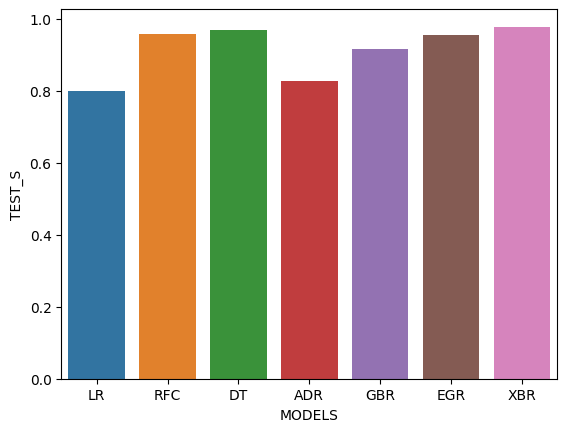

In [681]:
sn.barplot(data=score,x='MODELS',y='TEST_S')

In [682]:
import joblib as j
j.dump(df,open('df.jbl','wb'))
j.dump(pipe,open('pipe.jbl','wb'))